In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from api import disaster_api
from api import co2_api

plt.style.use('PR.mplstyle')

In [3]:
data = disaster_api.get_data()
data = data[data.year < 2017]
co2_data = co2_api.get_data()

In [4]:
counts = data.groupby('year').occurrence.sum()
x = counts.index
y = counts.values

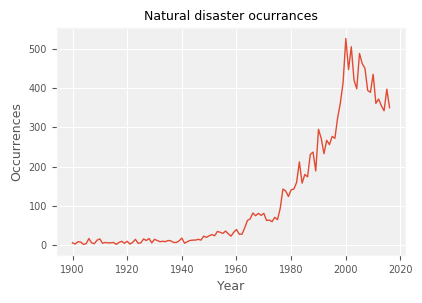

In [12]:
plt.figure()
plt.plot(x, y)
plt.title('Natural disaster occurrences')
plt.ylabel('Occurrences')
plt.xlabel('Year')
plt.show()

In [6]:
since1900 = co2_data[co2_data.kyear > (-120 / 1000)]
x_co2 = since1900.kyear
y_co2 = since1900.co2

x_co2 *= 1000
x_co2 += 2001  # last data point

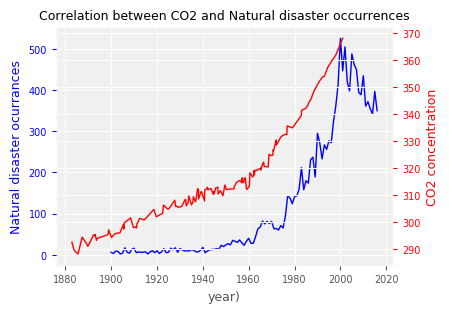

In [7]:
fig, ax1 = plt.subplots()
t = x
s1 = y
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Natural disaster occurrences', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x_co2, y_co2, 'r-')
ax2.set_ylabel('CO2 concentration', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()

plt.title("Correlation between CO2 and Natural disaster occurrences")
plt.show()

In [8]:
disaster_counts = data.groupby(['year', 'disasterType']).occurrence.sum()

In [9]:
disaster_counts.head(10)

year  disasterType     
1900  Drought              2
      Epidemic             1
      Flood                1
      Storm                1
      Volcanic activity    1
1901  Earthquake           2
      Epidemic             1
1902  Earthquake           3
      Storm                1
      Volcanic activity    5
Name: occurrence, dtype: int64

In [10]:
disaster_counts_u = disaster_counts.unstack(level=-1)   
disaster_counts_u.head()
disaster_counts_u['Extreme temperature'] = disaster_counts_u['Extreme temperature ']
del disaster_counts_u['Extreme temperature ']

disaster_counts_u = disaster_counts_u.fillna(0)

x = disaster_counts_u.index
drought = disaster_counts_u.Drought
epidemic = disaster_counts_u.Epidemic
temperature = disaster_counts_u['Extreme temperature']
earthquake = disaster_counts_u.Earthquake
flood = disaster_counts_u.Flood
storm = disaster_counts_u.Storm
wildfire = disaster_counts_u.Wildfire

# other types grouped under other types
insect = disaster_counts_u['Insect infestation']
other_types = disaster_counts_u.Landslide + disaster_counts_u.Fog + disaster_counts_u.Impact + insect

# print(disaster_counts_u.columns)



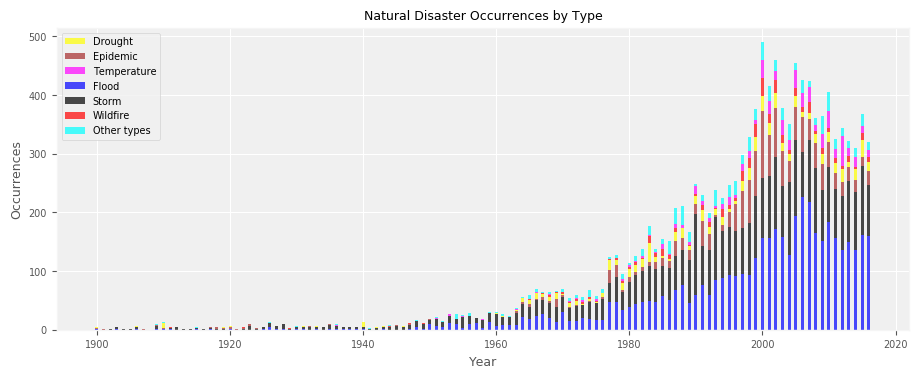

In [11]:
legend_attrs = ['Drought', 'Epidemic', 'Temperature', 'Flood', 'Storm', 'Wildfire', 'Other types']

plt.figure(figsize=(11, 4))
bar4 = plt.bar(x, flood, color='blue', align='center', alpha=0.7, width=0.45)
bar6 = plt.bar(x, storm, bottom=flood, color='black', align='center', alpha=0.7, width=0.45)
bar2 = plt.bar(x, epidemic, bottom=(flood + storm), color='brown', align="center",  alpha=0.7, width=0.45)
bar1 = plt.bar(x, drought, bottom=(flood + storm + epidemic), color="yellow", align='center', alpha=0.7, width=0.45)
bar7 = plt.bar(x, wildfire, bottom=(flood + storm + drought + epidemic), color='red', align='center', alpha=0.7, width=0.45)
bar3 = plt.bar(x, temperature, bottom=(flood + storm + drought + epidemic + wildfire), color='magenta', align='center',  alpha=0.7, width=0.45)
bar8 = plt.bar(x, other_types, bottom=(flood + storm + drought + epidemic + wildfire + temperature), color='cyan', align='center', alpha=0.7, width=0.45)

plt.legend([bar1, bar2, bar3, bar4, bar6, bar7, bar8], legend_attrs)

plt.title("Natural Disaster Occurrences by Type")
plt.ylabel("Occurrences")
plt.xlabel("Year")

plt.show()
